In [1]:
import tensorflow as tf
import modules.layers as tf_util
import modules.utility as util
import numpy as np
import tables
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()

#######################################################
# Get data
#############
#CT Dataset
data_path = '/media/marsdenlab/Data2/datasets/DeepLofting/'
train = data_path+'train_192_ct.hdf5'
val = data_path+'val_192_ct.hdf5'
test = data_path+'test_192_ct.hdf5'
MODEL_CODE = 'CT'

#MR Dataset
# train = data_path+'train_192_mr.hdf5'
# val = data_path+'val_192_mr.hdf5'
# test = data_path+'test_192_mr.hdf5'
# MODEL_CODE = 'MR'

f_train = tables.open_file(train)
f_val = tables.open_file(val)

input_shape = f_train.root.X.shape
output_shape = f_train.root.Y.shape
print input_shape, output_shape

print 'data shapes, train={},{}'.format(input_shape,output_shape)
print f_val.root.X.shape

##########################################

Using TensorFlow backend.


<IPython.core.display.Javascript object>

autoscrolling long output is disabled
(80004, 192, 192, 1) (80004, 192, 192, 1)
data shapes, train=(80004, 192, 192, 1),(80004, 192, 192, 1)
(4333, 192, 192, 1)


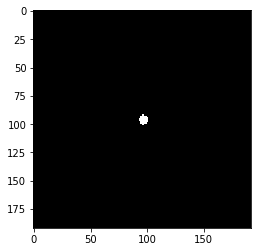

In [14]:
y = f_train.root.Y[30000]
plt.figure()
plt.imshow(y[:,:,0],cmap='gray')
plt.show()

In [18]:
def bbox(y):
    c = util.marchingSquares(y[:,:,0],iso=0.5,mode='center')
    xs = c[:,0]
    ys = c[:,1]

    w = np.amax(xs) - np.amin(xs)
    h = np.amax(ys) - np.amin(ys)
    ox = np.mean(xs)
    oy = np.mean(ys)

    np.asarray([ox,oy,w,h])

In [ ]:
B = np.array([bbox(y) for y in f_train.root.Y[:,:,:,0]])